# CA-2.2 Image Segmentation
## Part I: Noise Removal
***
* ID: 0000000
* Name: 000000

* Deadline: 000000 
1. Install Graphcuts for Python by executing: pip install PyMaxflow (or install manually from here). Read the online documents [website] to know how to set the edges of the graph. (http://pmneila.github.io/PyMaxflow/tutorial.html#binary-image-restoration) 
2. Write a python program to clean up the noise of the image in Figure 1, by employing an MRF and the binary graphcuts. See the pseudocode in C here. (https://tanrobby.github.io/teaching/ece_vision/CA2/pseudocode.html)
3. Change the value of the weighting factor (lambda) of the prior term, and show some different results (due to different values of lambda) in your report. You must state the values of your lambda along with the corresponding results.   
4. Show your results for different lambda values, and provide some discussion.       
5. Show the best result.

### 1. Import Libraries
* First, import libraries

In [1]:
#Import Libraries
import numpy as np
import cv2 as cv
from PIL import Image
import matplotlib.pyplot as plt
import maxflow

#import math
#import random
#import timeit

print(maxflow.__version__)

(1, 2, 13)


### 2. Function `dist`
* The function `dist` calculates the distance betwen two images and returns the distance array `dist`. The shape of the array is the same as the input images `img1` and `img2`.

In [2]:
# Distance Function
# Calculates the distance between two images.
# Returns the distance array. The shape of the array is the same as both images.
def dist(img1, img2):
    dist_R = abs(img1[:,:,0] - img2[:,:,0])
    dist_G = abs(img1[:,:,1] - img2[:,:,1])
    dist_B = abs(img1[:,:,2] - img2[:,:,2])
    dist = (dist_R + dist_G + dist_B)/3
    dist = dist.astype('uint8')
    
    return dist

### 3. Open image file
* Then, let's import a noisy image.

x:  573      y:  769      channel:  3
[212 173  94]


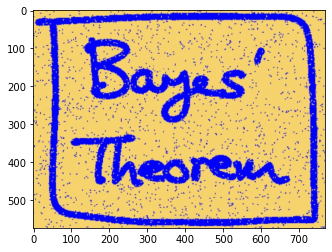

In [3]:
# Open Image
path = 'pic1.jpg'
img = Image.open(path)
# Change image to a numpy array.
img_array = np.array(img) # class: numpy.uint8

# Get the shape of the image.
x_shape, y_shape, channel = img_array.shape #573, 769, 3
print('x: ', x_shape, '     y: ', y_shape, '     channel: ', channel)

# Show the image.
plt.imshow(img_array.astype('uint8'))
#print(dist(img_array[0,0], img_array[50,50]))
print(img_array[0,0])

### 4. Define variables
* Let's set the values of the weighting factor (`m_lambda`), source color and sink color.
* The weighting factor `m_lambda` sets the smoothness of the result image. In the code below, `m_lambda` is set to 200.

In [4]:
# Define variables.
m_lambda = 200
Source_color = np.array([0, 0, 255]) #blue = foreground
# Sink_color = np.array([246, 211, 109]) #yellow = background
Sink_color = np.array([245,210,110])
# Keep the colors in a array for reconstructing image after graphcut.
colors = [[0, 0, 255], [245,210,110]]
# Convert to uint8 for reconstructing image.
colors = np.uint8(colors)

* Then, make foreground img `Source_img` with `Source_color`, and background img `Sink_img` with `Sink_color`. This images are used for setting the capacities of the terminal edges.

In [5]:
# Make foreground img (blue)
Source_img = np.zeros((img_array.shape))
for x in range(0, x_shape):
    for y in range(0, y_shape):
        Source_img[x,y] = Source_color
        
# Make background img (yellow)
Sink_img = np.zeros((img_array.shape))
for x in range(0, x_shape):
    for y in range(0, y_shape):
        Sink_img[x,y] = Sink_color

* The `Source_img` and `Sink_img` are shown below.

<function matplotlib.pyplot.show(close=None, block=None)>

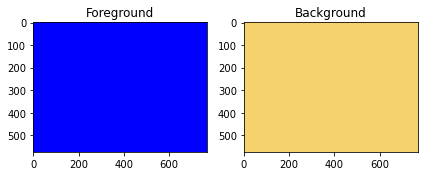

In [6]:
#Show foreground and background img
fig = plt.figure()
rows = 1; cols = 2
ax1 = fig.add_subplot(rows, cols, 1)
ax1.set_title('Foreground')
ax1.imshow(Source_img.astype('uint8'))

ax2 = fig.add_subplot(rows, cols, 2)
ax2.set_title('Background')
ax2.imshow(Sink_img.astype('uint8'))

fig.tight_layout()
plt.show

### 5. Employ an MRF and the binary graphcuts.
* Part I (2).
* Create a Source/Sink graph and set the capacites of non-terminal edges and terminal edges.

In [7]:
# Create Source/Sink graph
g = maxflow.Graph[int]()

# Add the nodes.
nodeids = g.add_grid_nodes((x_shape, y_shape))

# Prior term
# Add non-terminal edges with the same capacity, m_lambda.
g.add_grid_edges(nodeids, m_lambda)

# Data term
# Add the terminal edges.        
g.add_grid_tedges(nodeids, dist(Source_img, img_array), dist(Sink_img, img_array))

* Perform the maxflow computation.
* The result image is shown below (lambda = 200). We can see that the noise of the original image is cleaned up.

<function matplotlib.pyplot.show(close=None, block=None)>

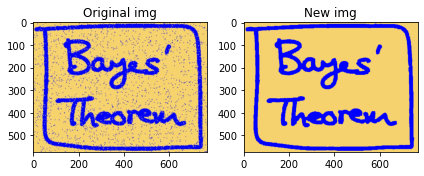

In [8]:
# Perform the maxflow computation and get the results.
# Find the maximum flow.
g.maxflow()
sgm = g.get_grid_segments(nodeids)

# Get the result of the graphcut.
new_img_array = np.int_(np.logical_not(sgm))

# Reconstruct image.
result_img = colors[new_img_array]

# Show the original image and new image after noise removal.
fig = plt.figure()
rows = 1; cols = 2
ax1 = fig.add_subplot(rows, cols, 1)
ax1.set_title('Original img')
ax1.imshow(img_array.astype('uint8'))

ax2 = fig.add_subplot(rows, cols, 2)
ax2.set_title('New img')
ax2.imshow(result_img.astype('uint8'))

fig.tight_layout()
plt.show

### 6. Change the value of lambda
* Part I (3) ~ (4).
* Let's change the value of the weighting factor (lambda) of the prior term and see the result.
* When the value of `m_lambda` is too small, (in this case, `m_lambda` = 3), we can see that the noise in the image is not properly removed.

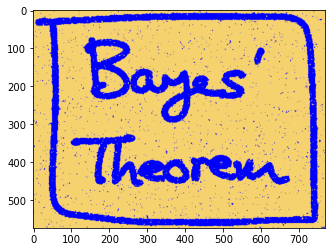

In [9]:
# Try with different lambda
m_lambda = 3
g = maxflow.Graph[int]()
nodeids = g.add_grid_nodes((x_shape, y_shape))
g.add_grid_edges(nodeids, m_lambda)
g.add_grid_tedges(nodeids, dist(Source_img, img_array), dist(Sink_img, img_array))
g.maxflow()
sgm = g.get_grid_segments(nodeids)
new_img_array = np.int_(np.logical_not(sgm))
result_img = colors[new_img_array]
plt.imshow(result_img.astype('uint8'))

* Let's try bigger `m_lambda` (in this case, `m_lambda` = 500). As we can see in the resulting image, if m_lambda is too big, the algorithm fails in graphcut. The yellow part of first 'e' in 'Theorem' has become blue after the graphcut.

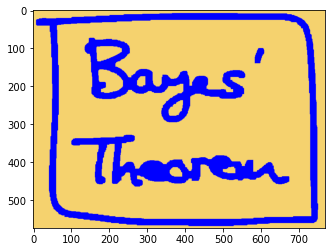

In [10]:
# Try with different lambda
m_lambda = 500
g = maxflow.Graph[int]()
nodeids = g.add_grid_nodes((x_shape, y_shape))
g.add_grid_edges(nodeids, m_lambda)
g.add_grid_tedges(nodeids, dist(Source_img, img_array), dist(Sink_img, img_array))
g.maxflow()
sgm = g.get_grid_segments(nodeids)
new_img_array = np.int_(np.logical_not(sgm))
result_img = colors[new_img_array]
plt.imshow(result_img.astype('uint8'))

### 7. Best result
* Part I (5)
* Thus, for the best result, we have to set `m_lambda` as a proper value - that is, not too small or not to big.

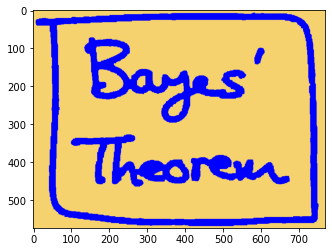

In [11]:
# Try with different lambda
m_lambda = 200
g = maxflow.Graph[int]()
nodeids = g.add_grid_nodes((x_shape, y_shape))
g.add_grid_edges(nodeids, m_lambda)
g.add_grid_tedges(nodeids, dist(Source_img, img_array), dist(Sink_img, img_array))
g.maxflow()
sgm = g.get_grid_segments(nodeids)
new_img_array = np.int_(np.logical_not(sgm))
result_img = colors[new_img_array]
plt.imshow(result_img.astype('uint8'))